# Lecture 20: Baseball Prospectus team statistics
***

In this notebook, we'll work on computing the Pythagorean Winning Percentage and comparing ERA and FIP.

Start by loading Numpy and Pandas using their common aliases, np and pd. 

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

local_path = 'winningPercentageData.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
dfTW= pd.read_csv(file_path)

# Inspect some of the data
dfTW.head()

,yearID,teamID,W,L,R,RA
0,2010,ARI,65,97,713,836
1,2010,ATL,91,71,738,629
2,2010,BAL,66,96,613,785
3,2010,BOS,89,73,818,744
4,2010,CHA,88,74,752,704


The data has columns for: 

- **yearID**: Year 
- **teamID**: Team
- **W**: Wins for season
- **L**: Losses for season
- **R**: Runs scored that season
- **RA**: Runs allowed that season

### Exercise 1 - How meaningful is Pythagorean WP?
***
Compare the actual winning percentage for teams at the end of the season to their Pythagorean score. How strong is the correlation? 

In [43]:
#Column for win percetnage
dfTW['Win%'] = dfTW['W']/(dfTW['W']+dfTW['L'])

#Column for Pythag score
dfTW['Pythag'] = (dfTW['R']**1.83)/((dfTW['R']**1.83)+(dfTW['RA']**1.83))

print ("Correlation: ", (dfTW['Win%'].corr(dfTW['Pythag'], method='pearson'))**2)

Correlation:  0.87331900133


### Exercise 2 - FIP vs. ERA
***
Imagine you are hanging out in CSEL, listening to the raucous conversations about sports that often occur in computer science. Anyway, you hear a wayward CSCI1300 student claim that FIP is a useless stat because it's the same as ERA. Any pitcher with a low ERA will also have a low FIP, and vice versa. You decide to investigate and possibly give him the mathematical smackdown of his life. Use the pitchingIn2013.csv file that magically appears before you, and on Moodle.

Use cFIP = 3.048.

$$FIP = \frac{((13*HR) + (3*(BB+HBP)) - (2*K))}{IP} + cFIP$$

In [9]:
local_path = 'pitchingIn2013.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
dfPitch= pd.read_csv(file_path)

# Inspect some of the data
dfPitch.head()

,playerID,teamID,HR,BB,HBP,SO,IP,ERA
0,aardsda01,NYN,7,19,4,36,39.6667,4.31
1,abadfe01,WAS,3,10,1,32,37.6667,3.35
2,aceveal01,BOS,8,22,0,24,37.0000,4.86
3,adamsmi03,PHI,5,11,1,23,25.0000,3.96
4,affelje01,SFN,2,17,4,21,33.6667,3.74


In [38]:
dfPitch['FIP']=(((13*dfPitch.HR)+(3*(dfPitch.BB+dfPitch.HBP))-(2*dfPitch.SO))/dfPitch.IP)+3.048
dfPitch = dfPitch.dropna(axis=1, how='any')
dfPitch.rename(index=str, columns={"ERA ": "ERA"})
dfPitch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 725
Data columns (total 9 columns):
playerID    726 non-null object
teamID      726 non-null object
HR          726 non-null int64
BB          726 non-null int64
HBP         726 non-null int64
SO          726 non-null int64
IP          726 non-null float64
ERA         726 non-null float64
FIP         726 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 76.7+ KB


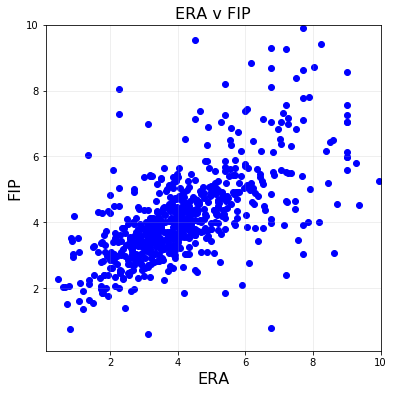

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axes.scatter(dfPitch["ERA"], dfPitch["FIP"], color = "blue")
axes.grid(alpha=0.25)
axes.set_xlabel("ERA", fontsize=16)
axes.set_ylabel("FIP", fontsize=16)
axes.set_title("ERA v FIP", fontsize=16)
axes.set_xlim(0.1,10)
axes.set_ylim(0.1,10)
plt.show()

In [40]:
dfPitch.corr()**2

,HR,BB,HBP,SO,IP,ERA,FIP
HR,1.000000,0.628075,0.375823,0.652853,0.765486,0.007160,0.005124
BB,0.628075,1.000000,0.469743,0.773874,0.823351,0.021571,0.031041
HBP,0.375823,0.469743,1.000000,0.439883,0.492474,0.011403,0.015725
SO,0.652853,0.773874,0.439883,1.000000,0.915739,0.032746,0.060455
IP,0.765486,0.823351,0.492474,0.915739,1.000000,0.028982,0.046971
ERA,0.007160,0.021571,0.011403,0.032746,0.028982,1.000000,0.623901
FIP,0.005124,0.031041,0.015725,0.060455,0.046971,0.623901,1.000000


There's a fairy strong correlation between ERA and FIP (.624), but not as strong as Win % and Pythagorean Score (0.8733).